# Introduction to Machine-Learning Practical #2
**By Corentin Meyer, PhD Student @ CSTB - iCube, 10/01 and 11/02 at the ESBS**  
In this pratical I will try to show you how to create a machine-learning model to predict the diabete risk of a person.  
We will perform data exploration, data processing, model training and evaluation and finally, fine-tuning.  
At different part of this pratical I will add screenshot of the lecture that I did at the beginning of the year to remind you on the concepts.  
You can access the lecture PDF here: https://raw.githubusercontent.com/lambda-science/machine-learning-introduction/main/CM_Intro_ML_Corentin_Meyer.pdf  

### Context
We will use the Diabetes dataset, a survey of more than 70,000 american people with 17 measurements per person and if they have diabetes or not. For the sake of this pratical I reduced the dataset to ~5,500 peoples.  
**Today we will try to build a machine-learning model that can predict if a personne will likely developpe diabetes or not.**  
If you want more details on the data you can find  them [here](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)  

<details><summary>We will use a total of 17 measurements to predict the diabetes. Click here to open the meaning of each column of the file</summary>
<p>
 <ul>
  <li><strong>Age:</strong> age of the person [18-95]</li>
  <li><strong>Sex:</strong> sex of the person [male, female]</li>
  <li><strong>High Chol:</strong> high level of cholesterol [yes, no]</li>
  <li><strong>CholCheck:</strong> cholesterol check in 5 years [yes, no]</li>
  <li><strong>BMI:</strong> body mass index [15-45]</li>
  <li><strong>Smoker:</strong> does the person smoke ? [0-1]</li>
  <li><strong>HeartDiseaseorAttack:</strong> had heart issues [0-1]</li>
  <li><strong>PhysActivity:</strong> physical activity past 30 days [0-1]</li>
  <li><strong>Fruits:</strong> eat fruit every days [0-1]</li>
  <li><strong>Veggies:</strong> eat veggis very days [0-1]</li>
  <li><strong>HvyAlcoholConsump:</strong> heavy alcohol drinker [0-1]</li>
  <li><strong>GenHlth:</strong> self-assessed general health level [excellent, very good, good, fair, poor]</li>
  <li><strong>MentHlth:</strong> days of poor mental health during last month [0-30]</li>
  <li><strong>PhysHlth:</strong> days of physical illness last 30 days [0-30]</li>
  <li><strong>DiffWalk:</strong> difficluty walking or climbing stairs [0-1]</li>
  <li><strong>Stroke:</strong> already had a stroke: [0-1]</li>
  <li><strong>HighBP:</strong> high blood pressure [0-1]</li>
</ul> 
</p>
</details>


In [ ]:
# With this command, you can download the data we will use on the server, simply run the cell.
!wget https://raw.githubusercontent.com/lambda-science/Machine-Learning-TD-ESBS/master/diabetes_data_TD.csv
import warnings
warnings.filterwarnings('ignore')

# Part 1 - Data Exploration
### Tasks: explore the data
* import the data
* count the number of persons and visualize the 5 first line
* see the diabete vs non-diabete person ratio
* plot a box-plot of the BMI and an histogram of the smokers
### Questions
1. How many persons are in this dataset ? (rows). How many features/measurements ? (columns)
2. What is the percentage of persons with diabetes ?
3. What is the median BMI of the persons in the dataset ? (approximatly with BoxPlot)
4. Is there more non-smoker or smokers in the dataset ? (Histogram)  
Bonus: it would be cool to do a PCA plot (clustering) on the data. But it wouldn't work for now do you know why ?  

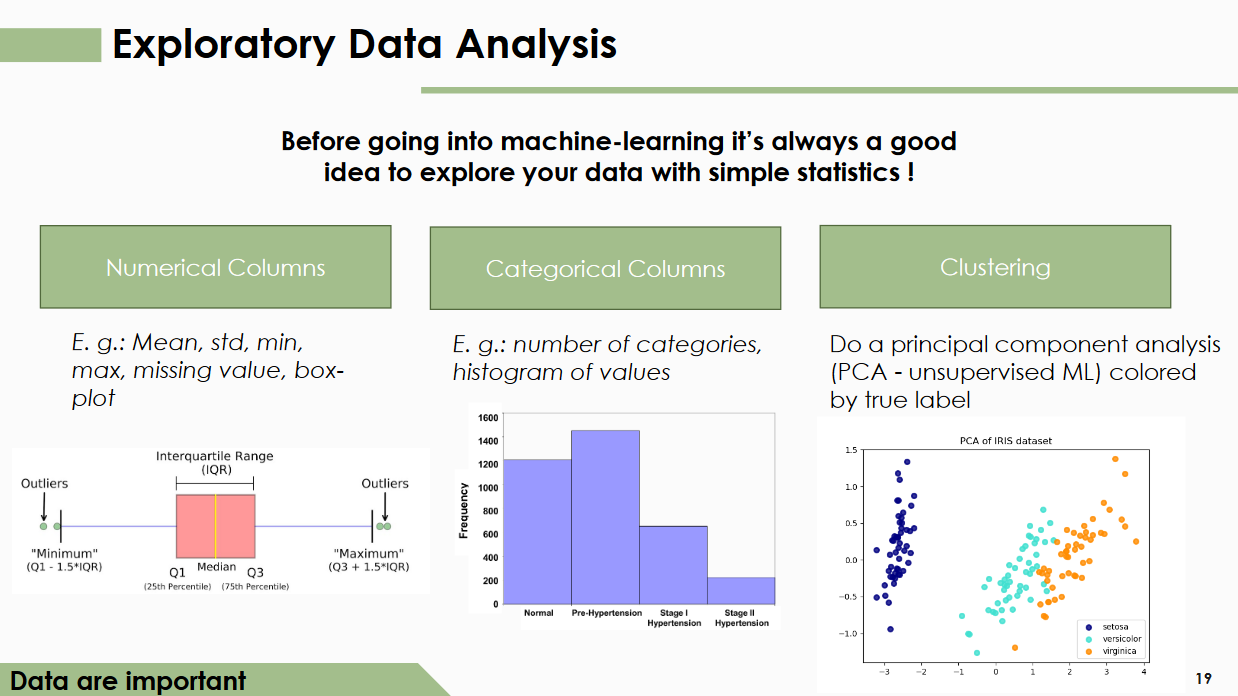

In [ ]:
# Pandas is the main library for data manipulation in Python
import pandas as pd
# Matplotlib is the main library for data visualization in Python
import matplotlib.pyplot as plt

# Import the data (df variable) using read_csv()
df = pd.read_csv("diabetes_data_TD.csv")

print("=== QUESTION 1 ===")
# Print the shape of the dataframe and the head using df.shape and df.head()
print(df.shape)
df.head()

In [ ]:
print("=== QUESTION 2 ===")
# Use value_counts() on the "stroke" column. 
# Tip: set the normalize parameter to true in the value_count() function !
print(df["Diabetes"].value_counts(normalize=True))

In [ ]:
print("=== QUESTION 3 ===")
# Make a boxplot of the "BMI" column using the boxplot() function
boxplot = df.boxplot(column="BMI")
# We use plt.show() to display the boxplot
plt.show(boxplot)

In [ ]:
print("=== QUESTION 4 ===")
# Make a histogram of the "Smoker" column using the hist() function
hist = df.hist(column="Smoker")
# We use plt.show() to display the histogram
plt.show(hist)

# Part 2 - Data Processing and splitting
### Tasks: encode the data to be usable for trainning by a ML algorithm
* analyze what columns we need to process and modify them to do machine-learning !
* split our dataset between a training dataset and a test dataset

### Questions
1. What columns are categorical data, what columns are numeric.
2. What columns are already ready to be used and needs no change.
3. What type of processing do you need to do on categorical data and why
4. What type of processing do you need to do on numeric data and why
5. What columns contains missing data ? What type of processing do you need to do in this case.

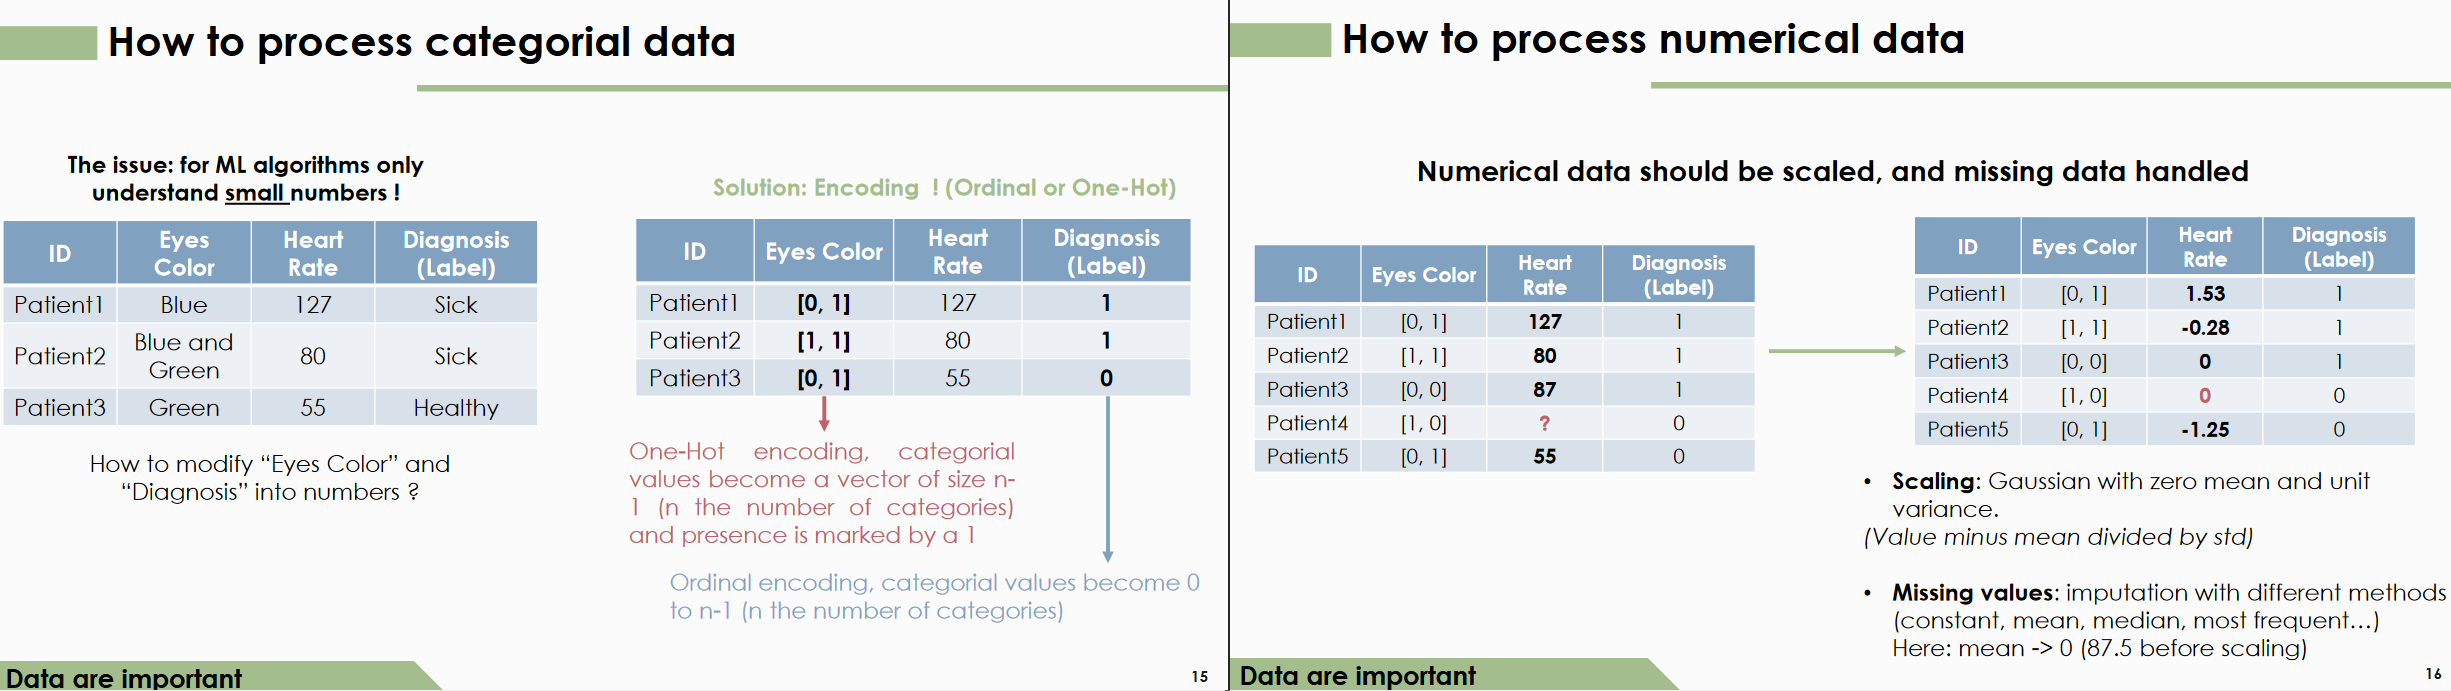


In [ ]:
print("=== QUESTION 1 to 4 ===")
# You should be able to answer the qestions 1 to 4 simply with the table below
df.head()

In [ ]:
print("=== QUESTION 5 ===")
# You should be able to answer the qestions 5 simply with the table below
# (remember how many rows there are in the dataframe)
df.info()

In [ ]:
# We will now process theses columns to make them usable
# From Scikit learn we import the tools we will need
# OrdinalEncoder for the categorical variables
# StandardScaler for the numerical variables
# IterativeImputer for the missing values
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# NumPy is the main library for array manipulation in Python
import numpy as np

# Create lists with columns names for each processing categories
columns_nothing_to_do = ["Smoker","HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "DiffWalk", "Stroke", "HighBP", "Diabetes"] # 10 Cols
categorical_columns_to_process = ["Sex", "HighChol", "CholCheck", "GenHlth", "MentHlth", "PhysHlth"] # 6 Cols
numerical_columns_to_process = ["Age", "BMI"] # 2 Cols


# Categorial data to numeric: do one hot encoding ( OrdinalEncoder(), .fit_transform() )
# I give you the OrdinalEncoder example. Do something similar for the Scaling of numerics data !
X_cat = df[categorical_columns_to_process]
X_cat_enc = OrdinalEncoder().fit_transform(X_cat)

# Numeric data: do scaling (-1,+1) (StandardScaler() and .fit_transform())
X_num = df[numerical_columns_to_process]
X_num_scaled = StandardScaler().fit_transform(X_num)

# Nothing-To-Do Cols: just select the data corresponding and convert the pandas dataframe to numpy array ( .to_numpy() )
X_nothing_to_do = df[columns_nothing_to_do]
X_nothing_to_do = X_nothing_to_do.to_numpy()

# Combine the X_cat_enc, X_num_scaled, and X_nothing_to_do data into a single array
# using np.concatenate ; TIP: Care for the axis parameter (axis=1)
array_data = np.concatenate((X_cat_enc, X_num_scaled, X_nothing_to_do), axis=1)

# Finally handle Missing Data: Use imputer to predict them ( IterativeImputer() and .fit_transform() on array_data
array_data = IterativeImputer().fit_transform(array_data)

# You can recreate a DataFrame for pretty printing, but this is optional. I give you the code.
df_data = pd.DataFrame(data=array_data, columns=list(X_cat.columns) + list(X_num.columns) + list(df[columns_nothing_to_do].columns))
df_data.head()

### Tasks: split our dataset between train and test set
* split our processed data into train and test dataset

### Questions
1. What train/test ratio should you use.
2. How many entries are in your train dataset and in your test dataset.
3. Verify that you have the same diabetes / diabetes ratio between train and test dataset.


In [ ]:
from sklearn.model_selection import train_test_split
# From your numpy array that you created, separate the X columns (features: mutiples columns) and the Y column (label: last column) in two variables
X = array_data[:,:-1]
Y = array_data[:,-1]

# Use train_test_split() using X and Y with the ratio you selected.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=777)

# Print X_train and X_test shape, use np.unique() with return_counts parameter on Y_train, x_test to get the 0/1 ratio
print(X_train.shape)
print(X_test.shape)
print(np.unique(Y_train, return_counts=True)[1])
print(np.unique(Y_test, return_counts=True)[1])

# PART 3: Create your machine-learning model
### Tasks: Choose a model and do basic evaluation

Select from scikit-learn a model and train it (fit) with the train data. Then calculate the accuracy of the model on the test data. Plot the confusion matrix of the test data classification.  
All ML algorithm in Sci-kit can be found here (1.1 to 1.11) https://scikit-learn.org/stable/supervised_learning.html  
Personally I will use a RandomForest or a decision tree for example.

### Questions:

1. Which model did you choose and why ? Have you set any particular (hyper)parameters ?
2. What accuracy-score do you get and what conclusion can you take ?
3. What do you observe on the confusion matrix and what conclusion can you take ?

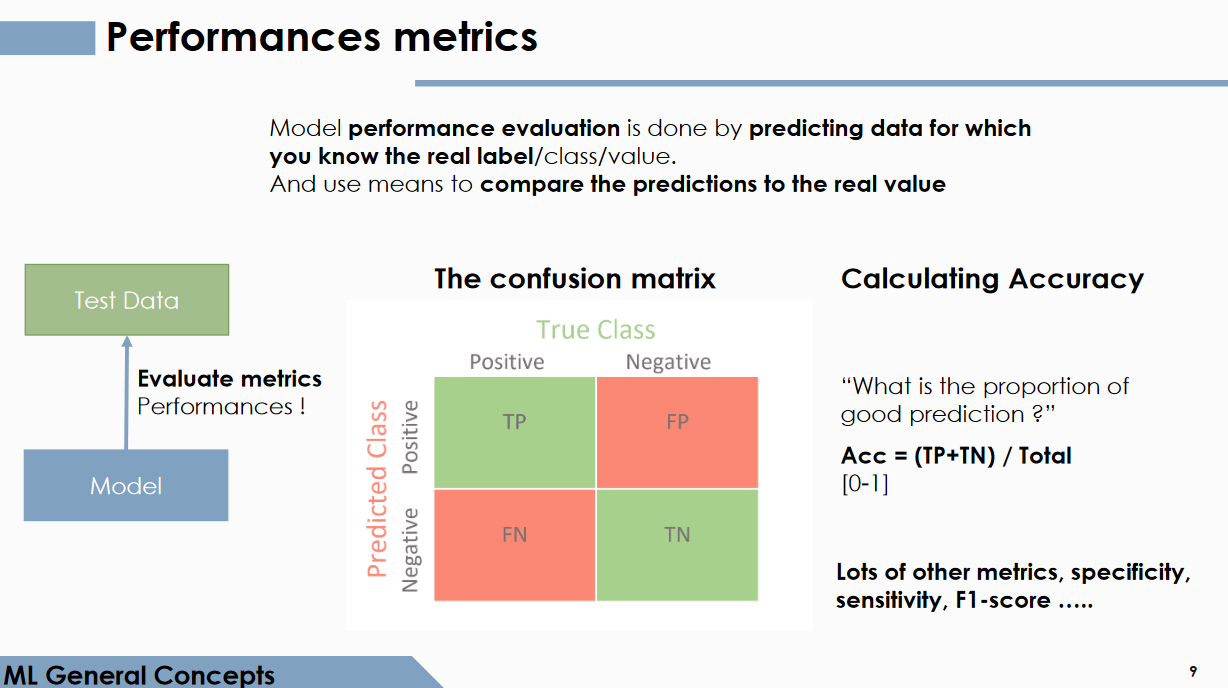

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Select a model from: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

# For example: create a clf variable containing a RandomForestClassifier(). 
# Don't hesitate to tweak its parameters as you like ! You can experiment.
# Use .fit() on clf variable with your X_train and Y_train to train the model.
clf = DecisionTreeClassifier(class_weight='balanced').fit(X_train, Y_train)

print("=== QUESTION 2-3 ===")
# Using the .score() method of clf, print its accuracy on X_test, Y_test
print(clf.score(X_test, Y_test))
# Plot the confusion matrix using ConfusionMatrixDisplay.from_estimator() with clf, X_test, Y_test)
display = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test)
plt.show(display.plot())


### Tasks: Correct the previous issue

You will now try to downsample your majority class (non-diabete) to the level of minority class (diabete) to have a 50/50 ratio and re-do a train/test split.  
Then you will re-train a new model with the new ratio-corrected data and get accuracy+confusion matrix plot. Don't only predict the class, but also show the prediction probability for all data in the test set !

### Questions

1. What accuracy-score do you get with the new model and what conclusion can you take.
2. What do you observe on the confusion matrix and what conclusion can you take.
3. Did you managed to print the probability of each prediction ? What's the shape of the prediction probability output ? Is there a high variance between the different test entries in probability ?

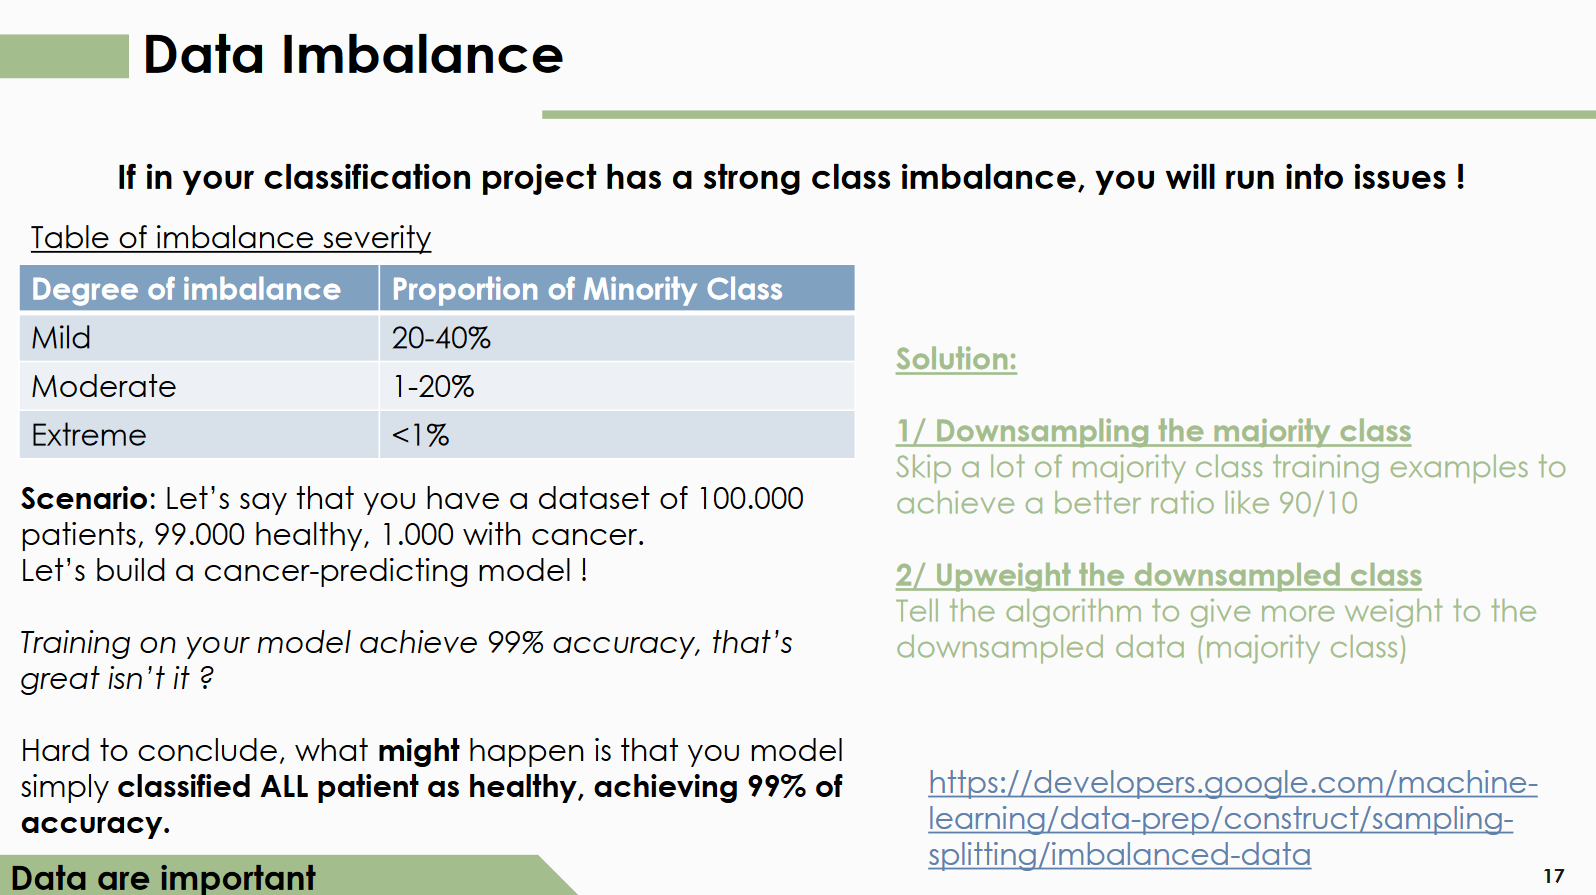

Graphical Recap of what we did so far and what we are going to do ! Because there is a lot of variable and it's easy to be lost.  
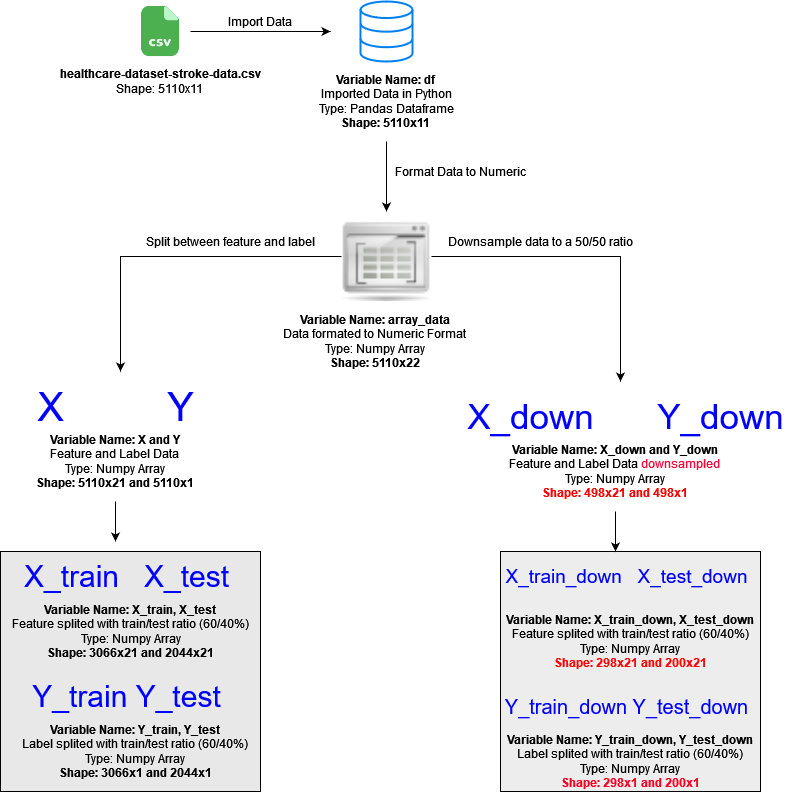


In [ ]:
# So here because it's a bit complicated I give you directly the code to do the downsampling.
# But you can try to read the code and understand how it works !
def downsample_majority_class(X, Y):
    np.random.seed(777)
    # Get index of rows for each class (0/1)
    i_class0 = np.where(Y == 0)[0]
    i_class1 = np.where(Y == 1)[0]
    # Total Number of observations in each class
    n_class0 = len(i_class0)
    n_class1 = len(i_class1)
    # For every observation of class 1, randomly select (sample) from index list of class 0 without replacement
    i_class0_downsampled = np.random.choice(i_class0, size=n_class1, replace=False)
    # Join together the downsampled class 0's target vector with class 1's target vector
    Y_down = np.hstack((Y[i_class0_downsampled], Y[i_class1]))
    X_down = np.vstack((X[i_class0_downsampled], X[i_class1]))
    return X_down, Y_down

# Call the function and store our new dataset in X_down, Y_down
X_down, Y_down = downsample_majority_class(X, Y)

# Re-do a train/test split but this time on the new X_down and Y_down data (downsampled).
# Call the new variables X_train_down, X_test_down, Y_train_down, Y_test_down for example.
X_train_down, X_test_down, Y_train_down, Y_test_down = train_test_split(X_down, Y_down, test_size=0.4, random_state=777)

# Recreate a model called clf_down with RandomForestClassifier()
# And .fit() it this time on X_train_down, Y_train_down
clf_down = DecisionTreeClassifier(class_weight='balanced', random_state=777).fit(X_train_down, Y_train_down)

print("=== QUESTION 1-3 ===")
# Calculate its accuracy using the .score() methods on X_test_down, Y_test_down
print(clf_down.score(X_test_down, Y_test_down))
# Plot the confusion matrix as before, but with clf_down, X_test_down, Y_test_down
display2 = ConfusionMatrixDisplay.from_estimator(clf_down, X_test_down, Y_test_down)  
plt.show(display2.plot())  

# Print the prediction probablity of the first 10 test data points using .predict_proba() of the model.
clf_down.predict_proba(X_test_down)[:10]



# PART 4: Evaluate your model

### Tasks: See all common metrics and evalute both models !

In this last part you will have to calculate all relevant metrics for a binary classification to compare your two models.
Make a table containing the results for both models in terms of: accuracy, balance accuracy, F1 Score, sensitivity (recall), specificity, Precision and confusion matrix data (True Pos., True Neg., False Pos., False Neg.)  

### Questions:

1. Which model have the accuracy ?
2. Do you know the difference between accuracy and balanced accuracy ? What model have the best balanced accuracy
3. Which model have the best F1-Score and sensitivity ?
4. Eventually, which model is better according to you based on the metrics ?



In [ ]:
# Calculate some relevant metrics for a binary classification
# Using Scikit score functions: https://scikit-learn.org/stable/modules/model_evaluation.html
# Complete "get_all_metrics" function to calculate: Accuracy, Balanced Accuracy, F1 Score, 
# Sensitivity (Recall), Specificity, Precision, TP TN FP FN

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

def get_all_metrics(clf, X_test, Y_test):
	""""Function that returns all the metrics for a given classifier and test data"""
	# Use classifier to predict the Y label of X_test data with .predict()
	y_pred = clf.predict(X_test)

	# Confusion Matrix results
	tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

	# Calculate the metrics: balanced accuracy, recall, precision, F1-score. Accuracy and Specificity are already done.
	ac = accuracy_score(Y_test, y_pred)
	bac = balanced_accuracy_score(Y_test, y_pred)
	re = recall_score(Y_test, y_pred)
	pr = precision_score(Y_test, y_pred)
	f1 = f1_score(Y_test, y_pred)
	try: sp = tn/float(tn+fp)
	except: sp = 0

	return [bac, ac, f1, re, sp, pr, tp, tn, fp, fn]

# Here is a function that create a table with the results of the two models, you don't need to touch it, just call it.
def make_table_clf(clf, clf_down, X_test, Y_test, X_test_down, Y_test_down):
	""""Use the get_all_metrics function to make a table to compare two models"""
	results = get_all_metrics(clf, X_test, Y_test)
	results_down = get_all_metrics(clf_down, X_test_down, Y_test_down)
	df = pd.DataFrame([[i for i in results], [j for j in results_down]], columns=["Balanced-Accuracy", "Accuracy", "F1-Score", "Sensitivity (Recall)", "Specificity", "Precision", "TP"," TN", "FP", "FN"], index=["CLF","CLF DownSampled"])
	return df

In [ ]:
print("=== QUESTION 1-4 ===")
# Use the make_table_clf function to compare the metrics of both models !
make_table_clf(clf, clf_down, X_test, Y_test, X_test_down, Y_test_down)

# Part 5: Can we improve the model further ?

# Context: 
**Can we improve the confidence on the performance measure of the model. And can we actually improve its performances ?**
* **Cross-Validation**  
Instead of a simple Test/Train split, we will do cross-validation. This means that we will train multiple models with different splits, so that all data have been used for training and all for testing. Then we will average the results of all models.
For example, if we do a 80/20% train/test split, then we would need to do a 5 fold cross-validation so that each data has been in the test-set at least once.
* **Hyper-Parameters Tuning**  
Each machine-learning algorithm (for example Random Forest) has a certain number of parameters that can be changed. For example the number of tree used to learn for the data, the maximum depth of the tree, the criterion setting ...  
Changing those parameters to find the optimal ones can actually improve the performance of the model !  
Here we will learn do hyper-parameters tuning (i.e. searching for the optimal parameters of your model) to improve the performances using what we call a "Grid Search"  

(Left: cross-validation, Right: hyper-parameters tuning)
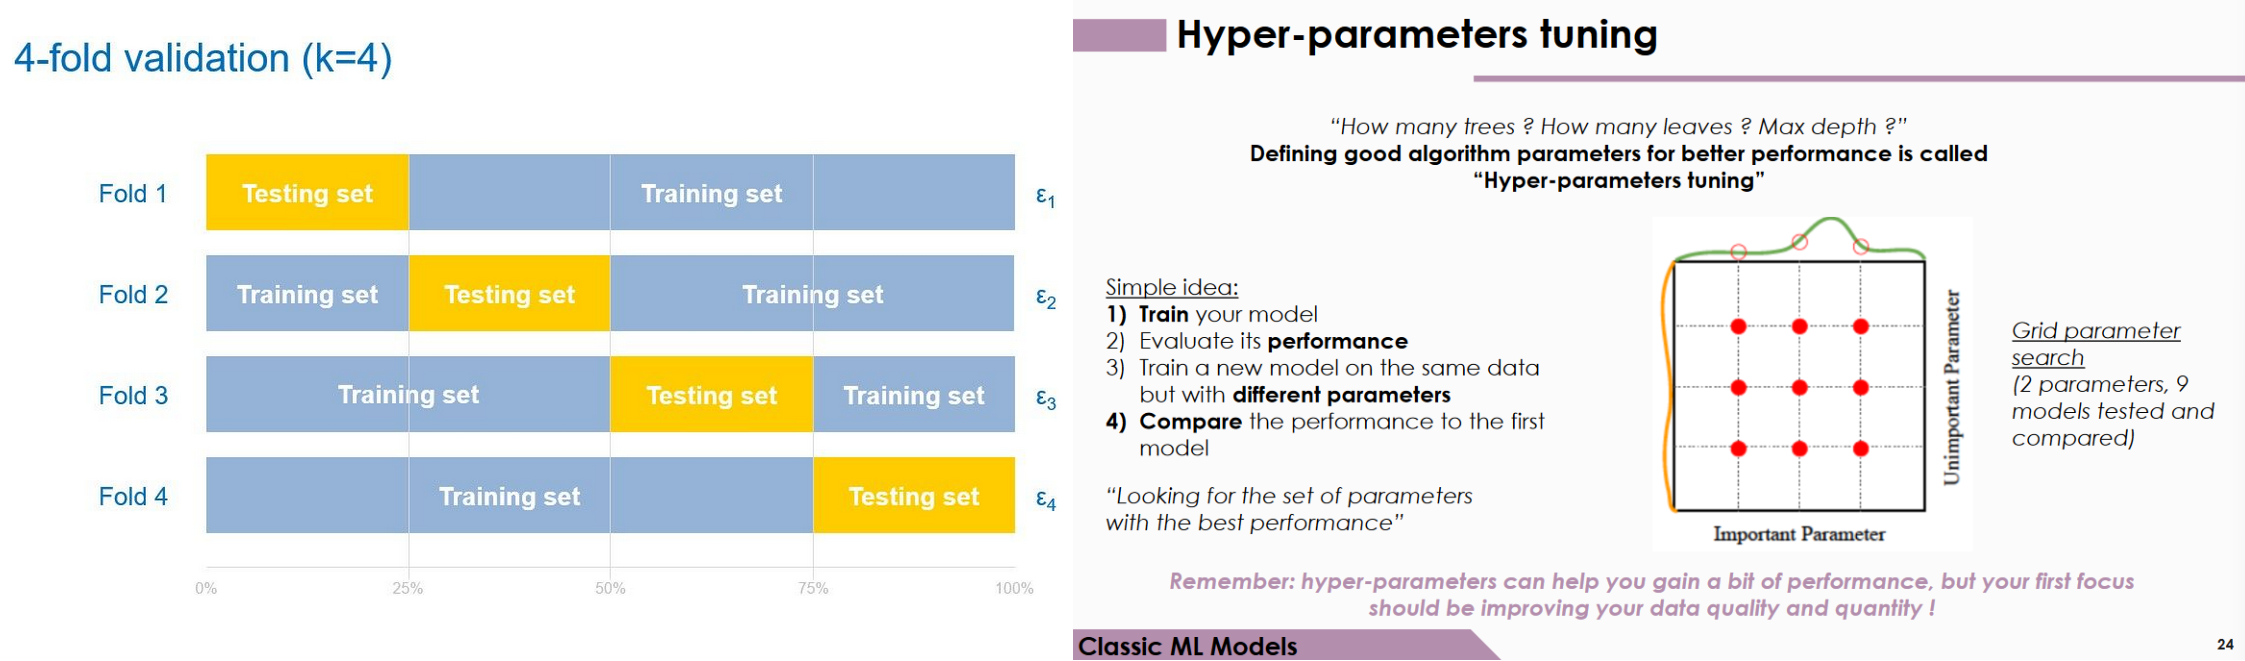

# Tasks:

# Questions: 
1. What is the point of cross-validation ? Does it increase performance ? If not, what is it useful for ? What is the maximum of fold you theoritically do for a cross-validation ?
2. For GridSearch, you need to choose what metric you want to maximize, what would you choose ? 
3. What are the parameters for the try with the best metric ? 
4. Compare the metric of the best model found using GridSearch to the metrics of the previous clf_down, is it better now ?

**Warnings**

This can be a pretty long task depending of your computer and the ML algorithm your chose because the program will train and test as many models as parameters combinaisons multiplied by the number of cross-validation you selected. If it's too long, you can cancel, lower the CV, lower the number of parameters you test or choose a less expensive ML algorithm (for example decision tree, logistic regression...)




In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
            'max_depth': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
            }
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, Y_train)
df_gridserach = pd.DataFrame(grid_search.cv_results_)
print("Best Metrics: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)
df_gridserach
